In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
df = (
    pd.read_csv("data/clean/hansen.csv", index_col=0)
        .loc[:,["code","tropics","country","year","loss"]]
)

df

,code,tropics,country,year,loss
0,ABW,True,Aruba,2001,0.000000
1,ABW,True,Aruba,2002,0.004013
2,ABW,True,Aruba,2003,0.006419
3,ABW,True,Aruba,2004,0.000000
4,ABW,True,Aruba,2005,0.000000
...,...,...,...,...,...
5035,ZWE,True,Zimbabwe,2016,43.054181
5036,ZWE,True,Zimbabwe,2017,110.233837
5037,ZWE,True,Zimbabwe,2018,22.014267
5038,ZWE,True,Zimbabwe,2019,46.772500


In [4]:
# Set overall font & theme
sns.set_theme(font_scale = 1.2)
sns.set_style("white")

# Forest loss by climate zone

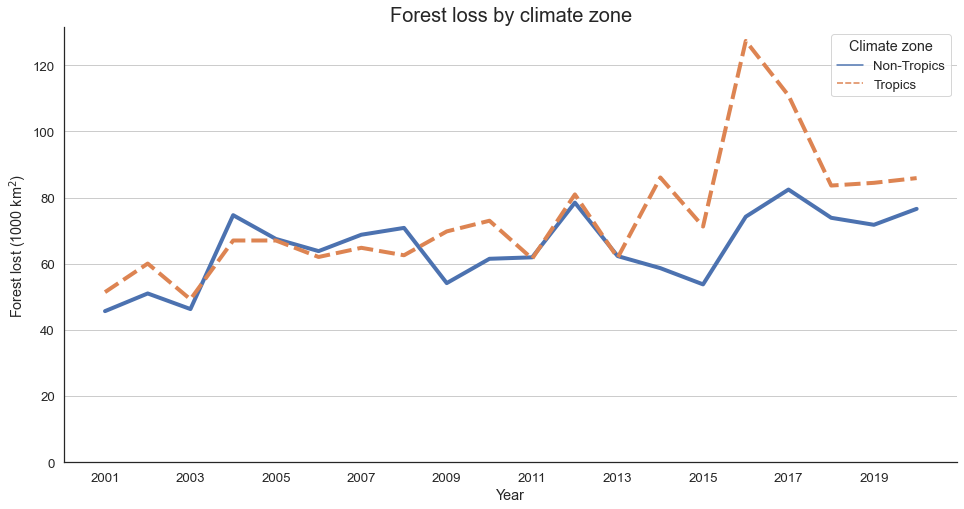

In [8]:
# Prepare data
df_by_climate = (
    df
        .groupby(["year","tropics"])
        # Sum over countries
        .agg(np.sum)
        .reset_index()
        .assign(
            # Change units from km^2 to 1000 km^2
            loss = lambda x: x.loss / 10**3,
            # Recode for legend labels
            tropics = lambda x: np.where(x.tropics, "Tropics", "Non-Tropics")
        )
)

# Set figure size
f, ax = plt.subplots(figsize=(16, 8))

# Plot function
g = sns.lineplot(
    data=df_by_climate,
    x="year", y="loss", hue="tropics", style="tropics",
    linewidth=4,
    legend=True, ax=ax
)

# Remove top and right figure borders
sns.despine()

# Title
ax.set_title("Forest loss by climate zone", fontsize=20)
# X axis
ax.set_xlabel("Year")
ax.set_xticks(range(2001,2021,2))
# Y axis
ax.set_ylabel("Forest lost (1000 km$^2$)")
ax.yaxis.grid(True)
ax.set_ylim(0)
# Legend
ax.get_legend().set_title("Climate zone")

plt.savefig("output/graphs/absolute_loss_tropics")

# Forest loss by country (tropical regions only)

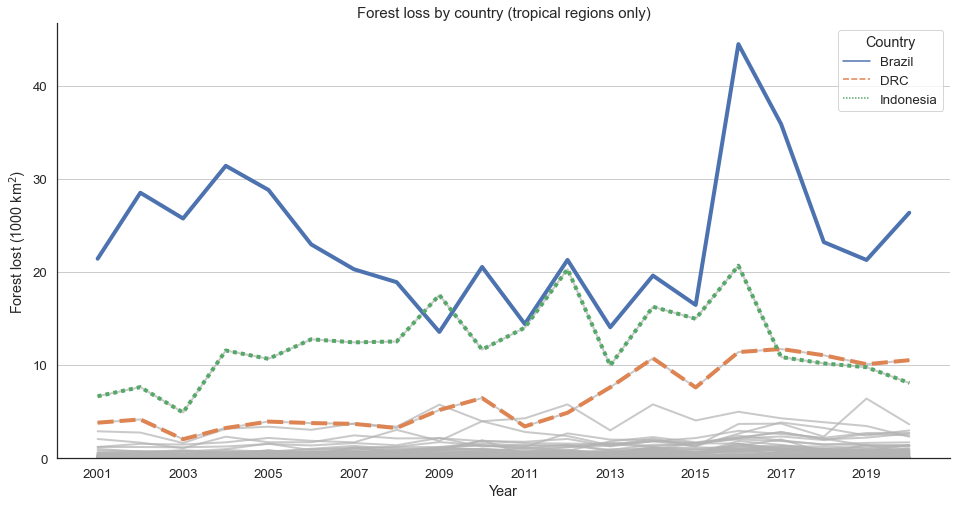

In [15]:
# Prepare data
df_countries = (
    df.query("tropics == True")
        .assign(
            # Change units from km^2 to 1000 km^2
            loss = lambda x: x.loss / 10**3,
        )
)

# Calculate top 3 countries by loss for highlighting
top_3_loss = (
    df_countries
        .groupby("code")
        # Sum over years
        .agg(np.sum)
        .sort_values("loss", ascending=False)
        .head(3)
        .index
        .to_list()
)

df_countries_top = df_countries.query(f"code in {top_3_loss}")

# Set figure size
f, ax = plt.subplots(figsize=(16, 8))

# Remove top and right figure borders
sns.despine()

x = "year"
y = "loss"

# Plot all countries in grey
for _, country in df_countries.groupby('country'):
    sns.lineplot(
        data=country,
        x=x, y=y, color=".7", alpha=.7,
        linewidth=2,
        legend=False, ax=ax
    )

# Plot top 3 countries highlighted by colour/linestyle
sns.lineplot(
    data=df_countries_top,
    x=x, y=y, hue="country", style="country",
    linewidth=4,
    legend=True, ax=ax
)

# Title
ax.set_title("Forest loss by country (tropical regions only)", fontsize=15)
# X axis
ax.set_xlabel("Year")
ax.set_xticks(range(2001,2021,2))
# Y axis
ax.yaxis.grid(True)
ax.set_ylim(0)
ax.set_ylabel("Forest lost (1000 km$^2$)")
# Legend
ax.get_legend().set_title("Country")

plt.savefig("output/graphs/absolute_loss_countries_tropics")